### Student Information
Name: 陳楓翔

Student ID: 109062561

GitHub ID: eric40424 (34576440)

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
# 第一部分在DM2020-Lab1-Master.ipynb
# 以下是第二部分

In [2]:
import pandas as pd

dataset1 = pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None,error_bad_lines=False)
dataset2 = pd.read_csv('imdb_labelled.txt',sep='\t',header=None,error_bad_lines=False)
dataset3 = pd.read_csv('yelp_labelled.txt',sep='\t',header=None,error_bad_lines=False)
frames = [dataset1, dataset2, dataset3]
X = pd.concat(frames,ignore_index=True)
X.columns = ["text", "score"]

In [3]:
len(X)

2748

In [4]:
X[0:2]

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

In [5]:
for t in X["text"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [6]:
import helpers.data_mining_helpers as dmh
category_name = []
a = ['amazon_cells_labelled' for i in range(len(dataset1))]
b = ['imdb_labelled' for i in range(len(dataset2))]
c = ['yelp_labelled' for i in range(len(dataset3))]
category_name.extend(a)
category_name.extend(b)
category_name.extend(c)
X['category'] = category_name

In [7]:
X[0:10]

text  score  \
0  So there is no way for me to plug it in here i...      0   
1                        Good case, Excellent value.      1   
2                             Great for the jawbone.      1   
3  Tied to charger for conversations lasting more...      0   
4                                  The mic is great.      1   
5  I have to jiggle the plug to get it to line up...      0   
6  If you have several dozen or several hundred c...      0   
7        If you are Razr owner...you must have this!      1   
8                Needless to say, I wasted my money.      0   
9                   What a waste of money and time!.      0   

                category  
0  amazon_cells_labelled  
1  amazon_cells_labelled  
2  amazon_cells_labelled  
3  amazon_cells_labelled  
4  amazon_cells_labelled  
5  amazon_cells_labelled  
6  amazon_cells_labelled  
7  amazon_cells_labelled  
8  amazon_cells_labelled  
9  amazon_cells_labelled

In [8]:
# a simple query
X[0:10][["text", "category"]]

text               category
0  So there is no way for me to plug it in here i...  amazon_cells_labelled
1                        Good case, Excellent value.  amazon_cells_labelled
2                             Great for the jawbone.  amazon_cells_labelled
3  Tied to charger for conversations lasting more...  amazon_cells_labelled
4                                  The mic is great.  amazon_cells_labelled
5  I have to jiggle the plug to get it to line up...  amazon_cells_labelled
6  If you have several dozen or several hundred c...  amazon_cells_labelled
7        If you are Razr owner...you must have this!  amazon_cells_labelled
8                Needless to say, I wasted my money.  amazon_cells_labelled
9                   What a waste of money and time!.  amazon_cells_labelled

In [9]:
# Let's query the least 10 records
X[-10:]

text  score       category
2738  The refried beans that came with my meal were ...      0  yelp_labelled
2739         Spend your money and time some place else.      0  yelp_labelled
2740  A lady at the table next to us found a live gr...      0  yelp_labelled
2741            the presentation of the food was awful.      0  yelp_labelled
2742           I can't tell you how disappointed I was.      0  yelp_labelled
2743  I think food should have flavor and texture an...      0  yelp_labelled
2744                           Appetite instantly gone.      0  yelp_labelled
2745  Overall I was not impressed and would not go b...      0  yelp_labelled
2746  The whole experience was underwhelming, and I ...      0  yelp_labelled
2747  Then, as if I hadn't wasted enough of my life ...      0  yelp_labelled

In [10]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

text  score
0   So there is no way for me to plug it in here i...      0
10                    And the sound quality is great.      1
20  I went on Motorola's website and followed all ...      0
30  This is a simple little phone to use, but the ...      0
40  It has a great camera thats 2MP, and the pics ...      1
50  Not loud enough and doesn't turn on like it sh...      0
60  Essentially you can forget Microsoft's tech su...      0
70                                  Mic Doesn't work.      0
80      I wear it everyday and it holds up very well.      1
90  For a product that costs as much as this one d...      0

In [11]:
# using loc (by label) Let us see if we can query every 10th record in our dataframe. In addition, our query must only contain the first 10 records
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [12]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

text  score  \
0   So there is no way for me to plug it in here i...      0   
10                    And the sound quality is great.      1   
20  I went on Motorola's website and followed all ...      0   
30  This is a simple little phone to use, but the ...      0   
40  It has a great camera thats 2MP, and the pics ...      1   
50  Not loud enough and doesn't turn on like it sh...      0   
60  Essentially you can forget Microsoft's tech su...      0   
70                                  Mic Doesn't work.      0   
80      I wear it everyday and it holds up very well.      1   
90  For a product that costs as much as this one d...      0   

                 category  
0   amazon_cells_labelled  
10  amazon_cells_labelled  
20  amazon_cells_labelled  
30  amazon_cells_labelled  
40  amazon_cells_labelled  
50  amazon_cells_labelled  
60  amazon_cells_labelled  
70  amazon_cells_labelled  
80  amazon_cells_labelled  
90  amazon_cells_labelled

In [13]:
# Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information
# query() Method
X.query('(index < 100) and (score == 1)') # 這個query方式可以找到所有index小於100且score=1的資料

# Selection by callable
X.loc[lambda df: df['score'] == 0, :] # 找到所有score是0的資料

# 還有很多有趣的querying techniques，這裡只舉幾個例子

text  score  \
0     So there is no way for me to plug it in here i...      0   
3     Tied to charger for conversations lasting more...      0   
5     I have to jiggle the plug to get it to line up...      0   
6     If you have several dozen or several hundred c...      0   
8                   Needless to say, I wasted my money.      0   
...                                                 ...    ...   
2743  I think food should have flavor and texture an...      0   
2744                           Appetite instantly gone.      0   
2745  Overall I was not impressed and would not go b...      0   
2746  The whole experience was underwhelming, and I ...      0   
2747  Then, as if I hadn't wasted enough of my life ...      0   

                   category  
0     amazon_cells_labelled  
3     amazon_cells_labelled  
5     amazon_cells_labelled  
6     amazon_cells_labelled  
8     amazon_cells_labelled  
...                     ...  
2743          yelp_labelled  
2744          yelp_labelled  
2745          yelp_labelled  
2746          yelp_labelled  
2747          yelp_labelled  

[1362 rows x 3 columns]

In [14]:
# Try to fecth records belonging to the comp.graphics category, and query every 10th record. Only show the first 5 records
X.loc[lambda f: f.category == 'yelp_labelled'].iloc[::10,:][0:5]

text  score       category
1748                           Wow... Loved this place.      1  yelp_labelled
1758                           Service was very prompt.      1  yelp_labelled
1768                                The Burrittos Blah!      0  yelp_labelled
1778  Also there are combos like a burger, fries, an...      1  yelp_labelled
1788                       The shrimp tender and moist.      1  yelp_labelled

In [15]:
X.isnull()

text  score  category
0     False  False     False
1     False  False     False
2     False  False     False
3     False  False     False
4     False  False     False
...     ...    ...       ...
2743  False  False     False
2744  False  False     False
2745  False  False     False
2746  False  False     False
2747  False  False     False

[2748 rows x 3 columns]

In [16]:
# It is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object

In [17]:
# Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [18]:
dummy_series = pd.Series(["dummy_record", "dummy_category"], index=["text", "category"])

In [19]:
dummy_series

text          dummy_record
category    dummy_category
dtype: object

In [20]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [21]:
# check if the records was commited into result
len(result_with_series)

2749

In [22]:
# Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
category    (The amoung of missing records is: , 0)
dtype: object

In [23]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 'dummy_category'
              }]

In [24]:
X = X.append(dummy_dict, ignore_index=True)

In [25]:
len(X)

2749

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
category    (The amoung of missing records is: , 0)
dtype: object

In [27]:
# The code to drop the record with missing that we just added
X.dropna(inplace=True)

In [28]:
# ... and now let us test to see if we gotten rid of the records with missing values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object

In [29]:
len(X)

2748

In [30]:
# Here is the line of code that checks for duplicates
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [31]:
# We can also check the sum of duplicate records by simply doing:
sum(X.duplicated())

17

In [32]:
# Let us only check for duplicates by onyl checking the text attribute
sum(X.duplicated('text'))

17

In [33]:
# Now let us create some duplicated dummy records and append it to the main dataframe X. Subsequenlty, let us try to get rid of the duplicates.
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'score': 1, 
                             'category': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'score': 1, 
                             'category': "dummy category"
                        }]

In [34]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [35]:
len(X)

2750

In [36]:
sum(X.duplicated('text'))

18

In [37]:
# In our case, we want to get rid of all the duplicated records with preserving a copy
X.drop_duplicates(keep="first", inplace=True) # inplace applies changes directly on our dataframe

In [38]:
len(X)

2732

In [39]:
X.drop(X.tail(1).index,inplace=True) # drop last rows 把剛剛最後自己加上去的duplicate資料刪掉，因為沒意義，只是為了做實驗

In [40]:
X[-5:]

text  score       category
2743  I think food should have flavor and texture an...    0.0  yelp_labelled
2744                           Appetite instantly gone.    0.0  yelp_labelled
2745  Overall I was not impressed and would not go b...    0.0  yelp_labelled
2746  The whole experience was underwhelming, and I ...    0.0  yelp_labelled
2747  Then, as if I hadn't wasted enough of my life ...    0.0  yelp_labelled

In [41]:
len(X)

2731

In [42]:
X_sample = X.sample(n=1000) #random state

In [43]:
len(X_sample)

1000

In [44]:
X_sample[0:4]

text  score       category
1426  The basic premise is wasted since it is sideli...    0.0  imdb_labelled
2241                    CONCLUSION: Very filling meals.    1.0  yelp_labelled
1957  The sides are delish - mixed mushrooms, yukon ...    1.0  yelp_labelled
1698  Both Rickman and Stowe play their roles to the...    1.0  imdb_labelled

In [45]:
X_sample[0:20]

text  score  \
1426  The basic premise is wasted since it is sideli...    0.0   
2241                    CONCLUSION: Very filling meals.    1.0   
1957  The sides are delish - mixed mushrooms, yukon ...    1.0   
1698  Both Rickman and Stowe play their roles to the...    1.0   
498                                       Bad Purchase.    0.0   
1207                             I rather enjoyed it.      1.0   
565                               Disapointing Results.    0.0   
2667  What SHOULD have been a hilarious, yummy Chris...    0.0   
2146  Service is perfect and the family atmosphere i...    1.0   
1045  The only thing really worth watching was the s...    1.0   
304   Everything worked on the first try.The device ...    1.0   
1708  I was particularly pleased with the acting abi...    1.0   
1204  It was very popular when I was in the cinema, ...    1.0   
479                              I'd like to return it.    0.0   
2646  Highly unprofessional and rude to a loyal patron!    0.0   
94                             Dont waste your money...    0.0   
1382  This was reflected not only in the cast, but a...    0.0   
800                                  Good , works fine.    1.0   
208                                Good transmit audio.    1.0   
2257                           Thoroughly disappointed!    0.0   

                   category  
1426          imdb_labelled  
2241          yelp_labelled  
1957          yelp_labelled  
1698          imdb_labelled  
498   amazon_cells_labelled  
1207          imdb_labelled  
565   amazon_cells_labelled  
2667          yelp_labelled  
2146          yelp_labelled  
1045          imdb_labelled  
304   amazon_cells_labelled  
1708          imdb_labelled  
1204          imdb_labelled  
479   amazon_cells_labelled  
2646          yelp_labelled  
94    amazon_cells_labelled  
1382          imdb_labelled  
800   amazon_cells_labelled  
208   amazon_cells_labelled  
2257          yelp_labelled

In [46]:
X[0:20]

text  score  \
0   So there is no way for me to plug it in here i...    0.0   
1                         Good case, Excellent value.    1.0   
2                              Great for the jawbone.    1.0   
3   Tied to charger for conversations lasting more...    0.0   
4                                   The mic is great.    1.0   
5   I have to jiggle the plug to get it to line up...    0.0   
6   If you have several dozen or several hundred c...    0.0   
7         If you are Razr owner...you must have this!    1.0   
8                 Needless to say, I wasted my money.    0.0   
9                    What a waste of money and time!.    0.0   
10                    And the sound quality is great.    1.0   
11  He was very impressed when going from the orig...    1.0   
12  If the two were seperated by a mere 5+ ft I st...    0.0   
13                           Very good quality though    1.0   
14  The design is very odd, as the ear "clip" is n...    0.0   
15  Highly recommend for any one who has a blue to...    1.0   
16                I advise EVERYONE DO NOT BE FOOLED!    0.0   
17                                   So Far So Good!.    1.0   
18                                      Works great!.    1.0   
19  It clicks into place in a way that makes you w...    0.0   

                 category  
0   amazon_cells_labelled  
1   amazon_cells_labelled  
2   amazon_cells_labelled  
3   amazon_cells_labelled  
4   amazon_cells_labelled  
5   amazon_cells_labelled  
6   amazon_cells_labelled  
7   amazon_cells_labelled  
8   amazon_cells_labelled  
9   amazon_cells_labelled  
10  amazon_cells_labelled  
11  amazon_cells_labelled  
12  amazon_cells_labelled  
13  amazon_cells_labelled  
14  amazon_cells_labelled  
15  amazon_cells_labelled  
16  amazon_cells_labelled  
17  amazon_cells_labelled  
18  amazon_cells_labelled  
19  amazon_cells_labelled

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp_labelled            996
amazon_cells_labelled    990
imdb_labelled            745
Name: category, dtype: int64


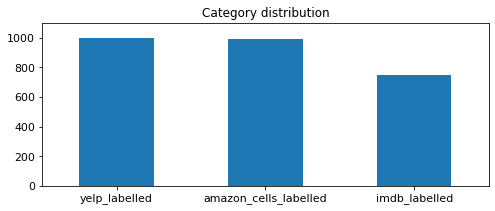

In [48]:
print(X.category.value_counts())
# plot barchart for X_sample
X.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon_cells_labelled    361
yelp_labelled            352
imdb_labelled            287
Name: category, dtype: int64


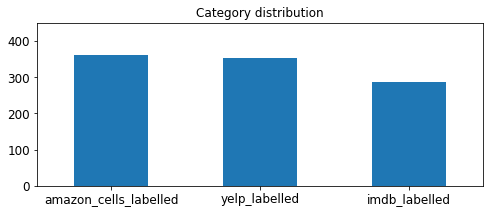

In [49]:
print(X_sample.category.value_counts())

# plot barchart for X_sample
X_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 450], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

amazon_cells_labelled    361
yelp_labelled            352
imdb_labelled            287
Name: category, dtype: int64


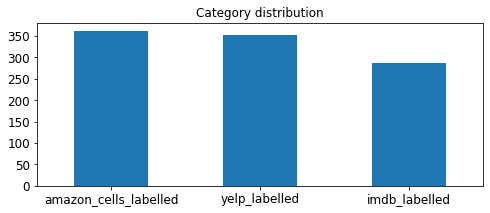

In [50]:
# Notice that for the ylim parameters we hardcoded the maximum value for y. It is possible to automate this instead of hard-coding it
upper_bound = max(X_sample.category.value_counts()) + 20
print(X_sample.category.value_counts())

# plot barchart for X_sample
X_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

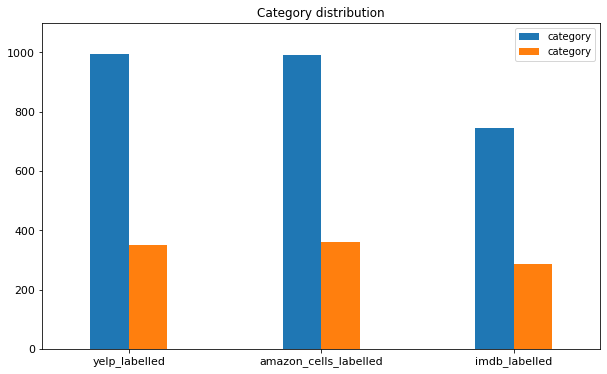

In [51]:
# We can also do a side-by-side comparison of the distribution between the two datasets
X_category_merge = pd.concat([X.category.value_counts(), X_sample.category.value_counts()], axis=1)
X_category_merge.plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1100],        
                                    rot = 0, fontsize = 11, figsize = (10,6), width=0.4)

In [52]:
import nltk

In [53]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [54]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [55]:
X[0:4]

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   

                category                                           unigrams  
0  amazon_cells_labelled  [So, there, is, no, way, for, me, to, plug, it...  
1  amazon_cells_labelled               [Good, case, ,, Excellent, value, .]  
2  amazon_cells_labelled                      [Great, for, the, jawbone, .]  
3  amazon_cells_labelled  [Tied, to, charger, for, conversations, lastin...

In [56]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [57]:
# let us use scikit learn built in functionalities to generate this document
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [58]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [59]:
# Let's analyze the first record of our X dataframe with the new analyzer we have just built
analyze(X.loc[0,'text'])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [60]:
# We can check the shape of this matrix by:
X_counts.shape

(2731, 5155)

In [61]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [62]:
X[0:5]

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   

                category                                           unigrams  
0  amazon_cells_labelled  [So, there, is, no, way, for, me, to, plug, it...  
1  amazon_cells_labelled               [Good, case, ,, Excellent, value, .]  
2  amazon_cells_labelled                      [Great, for, the, jawbone, .]  
3  amazon_cells_labelled  [Tied, to, charger, for, conversations, lastin...  
4  amazon_cells_labelled                           [The, mic, is, great, .]

In [63]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [64]:
# Notice that there is 1 in the record. Can you provide code that can verify what word this 1 represents from the vocabulary
import numpy as np
temp = X_counts[0:5, 0:100].toarray()

count_vect.get_feature_names()[np.where(temp[3] == 1)[0][0]]
# 答案是'45'

'45'

In [65]:
# We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
# Now let us put a 00 in the document to see if it is detected as we expect
count_vect.transform(['00 It costs me a lot of time QQ!']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
# Let us look at this nice little heat map of our term-document matrix
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [68]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [69]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [70]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [71]:
plot_z = X_counts[0:20, 0:20].toarray()

In [72]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

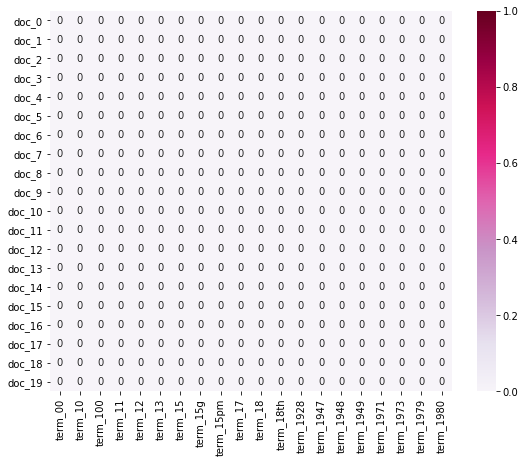

In [73]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

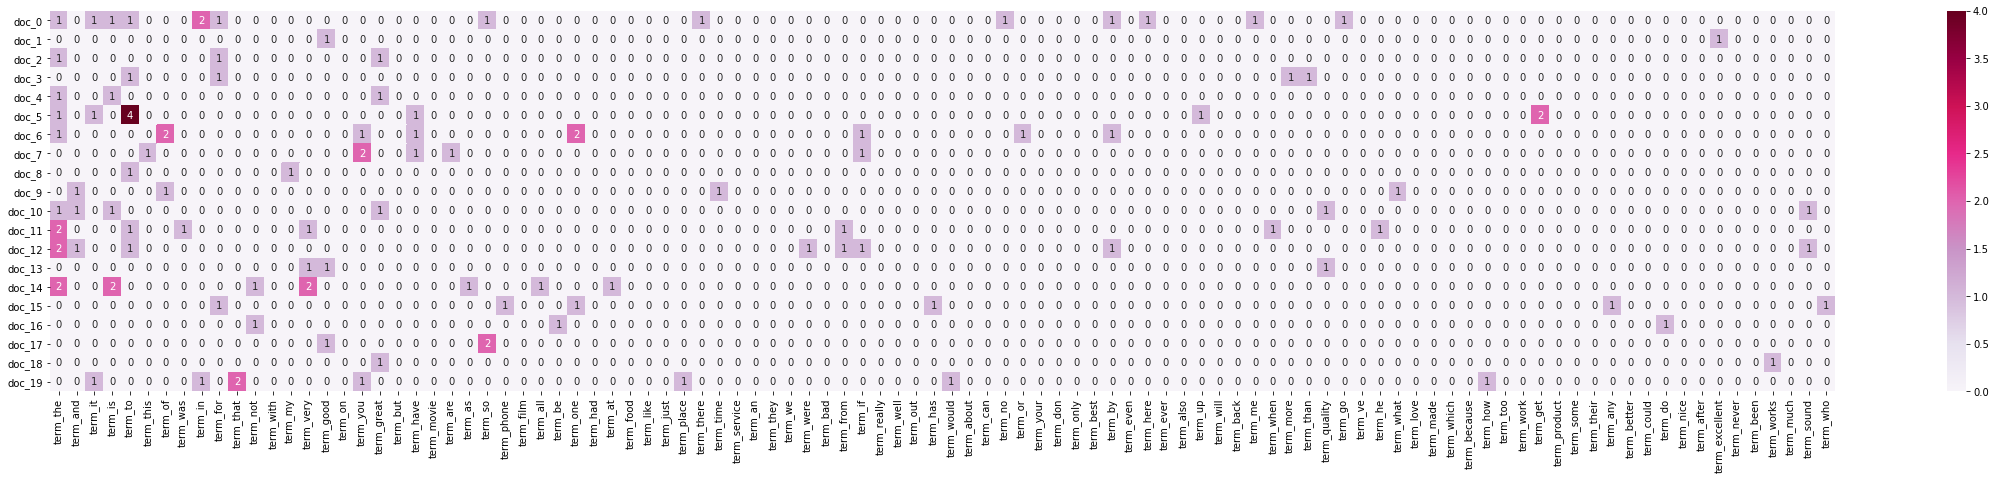

In [74]:
# 我會選擇sample，因為整體的term-document matrix實在太大了，所以如果要全部顯示會花很多時間，我把terms按照頻率高低排序，
# 所以會發現左邊顏色較深，越往右越淺
temp_x = count_vect.get_feature_names()[:]
temp_z = X_counts[:,:].toarray()
temp_z = np.transpose(temp_z)
temp_z_sum = np.asarray(X_counts.sum(axis=0))[0]

x_11 = []
y_11 = []
z_11 = []
for i in sorted(zip(list(temp_z_sum),list(temp_z),list(temp_x)),reverse=True,key=lambda x: x[0]):
    x_11.append(i[0])
    y_11.append(i[1])
    z_11.append(i[2])

plot_x = ["term_"+str(i) for i in z_11[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
y_11 = np.array(y_11)
y_11 = np.transpose(y_11)
plot_z = y_11[0:20, 0:100]
max_num = 0
for a in plot_z:
    for b in a:
        if b > max_num : max_num = b


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(40, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_num, annot=True)

In [75]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

In [76]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [77]:
X_reduced.shape

(2731, 2)

In [78]:
X.category

0       amazon_cells_labelled
1       amazon_cells_labelled
2       amazon_cells_labelled
3       amazon_cells_labelled
4       amazon_cells_labelled
                ...          
2743            yelp_labelled
2744            yelp_labelled
2745            yelp_labelled
2746            yelp_labelled
2747            yelp_labelled
Name: category, Length: 2731, dtype: object

In [79]:
categories = ['amazon_cells_labelled','imdb_labelled','yelp_labelled']

In [80]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

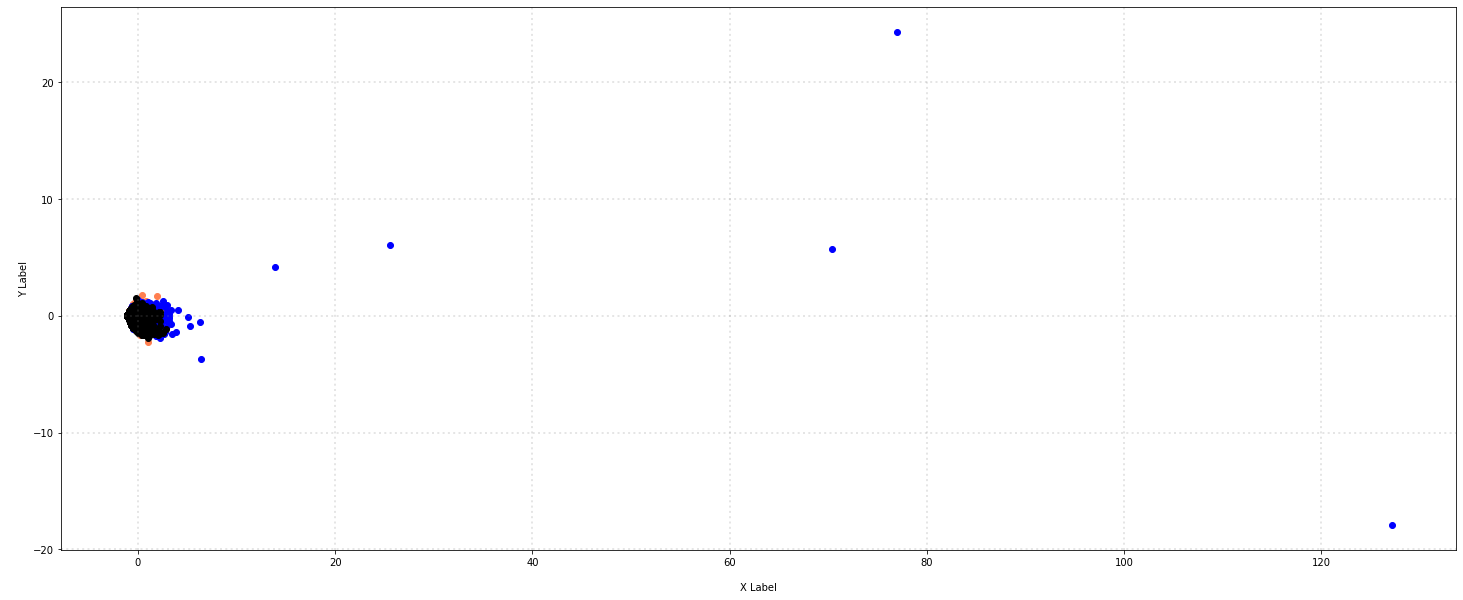

In [81]:
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

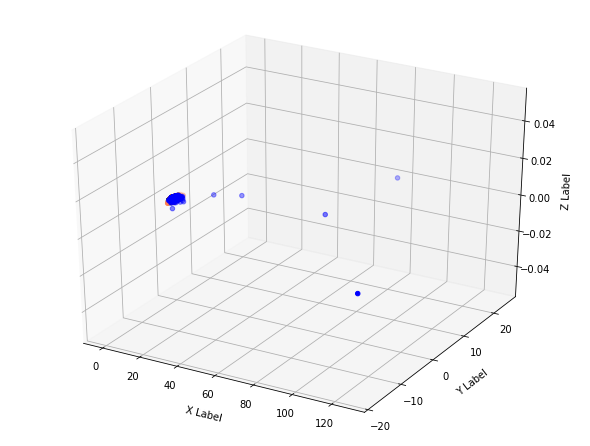

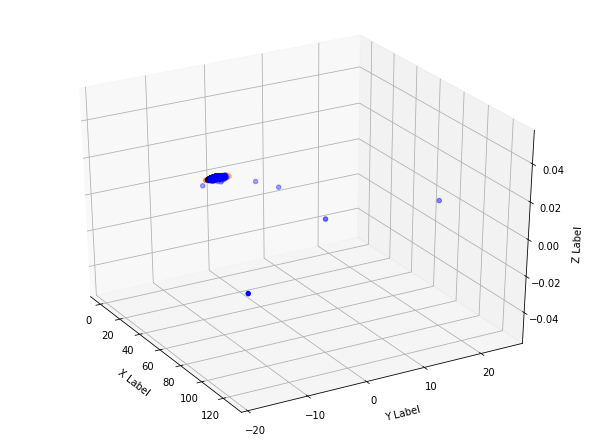

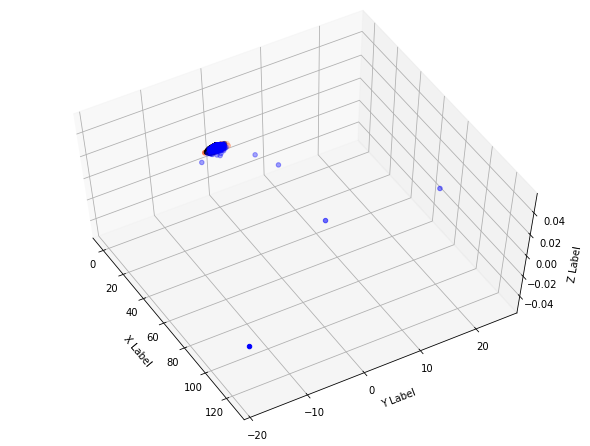

In [82]:
# Plot the result use 3-D plot. Use at least 3 different angle (camera position)
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black']

# plot
fig1 = plt.figure(figsize = (8,6))
ax1 = Axes3D(fig1, azim=-60, elev=30)
fig2 = plt.figure(figsize = (8,6))
ax2 = Axes3D(fig2, azim=-30, elev=30)
fig3 = plt.figure(figsize = (8,6))
ax3 = Axes3D(fig3, azim=-30, elev=60)

for c, category in zip(col, categories):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
    Zx = X_reduced[X['category'] == category].T[2]
    
    ax1.scatter(xs, ys, c = c, marker='o')
    ax2.scatter(xs, ys, c = c, marker='o')
    ax3.scatter(xs, ys, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

plt.show()

In [83]:
# Atrribute Transformation / Aggregation
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [84]:
term_frequencies

array([ 1, 36,  3, ...,  1,  2,  1], dtype=int64)

In [85]:
term_frequencies[0]

1

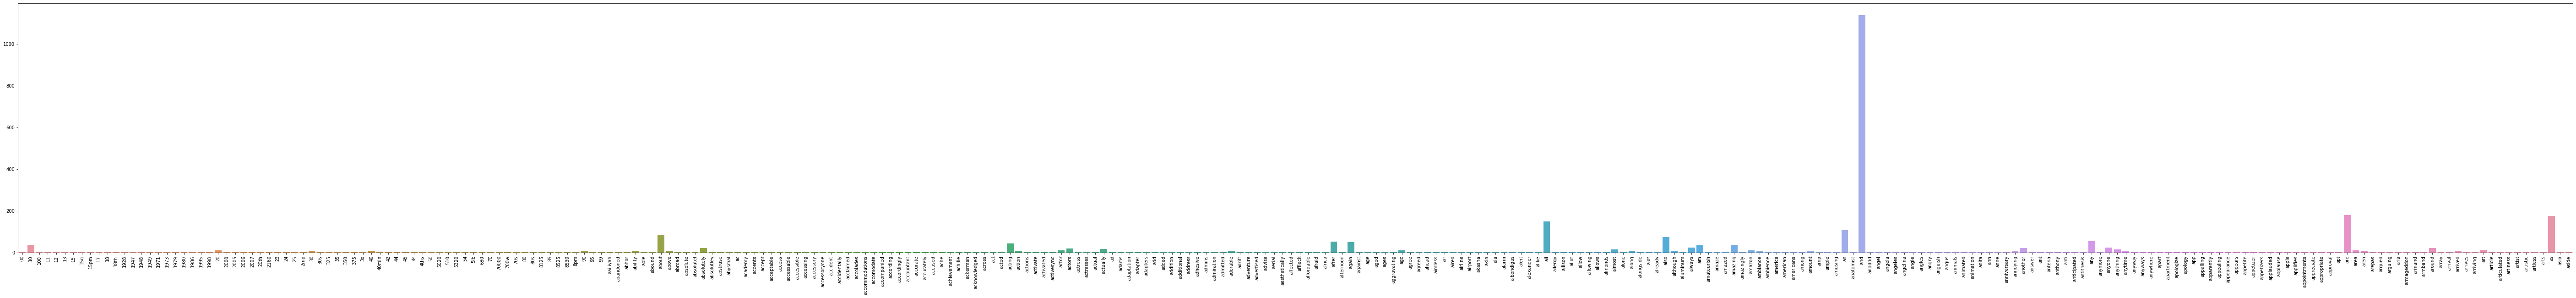

In [86]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [87]:
# Plotly
# Only get the first 300 items
from plotly.offline import iplot
import plotly.graph_objects as go
x_14 = plot_x[0:300]
y_14 = list(term_frequencies)[0:300]
data = [go.Bar(x=x_14,y=y_14)]
iplot(data)

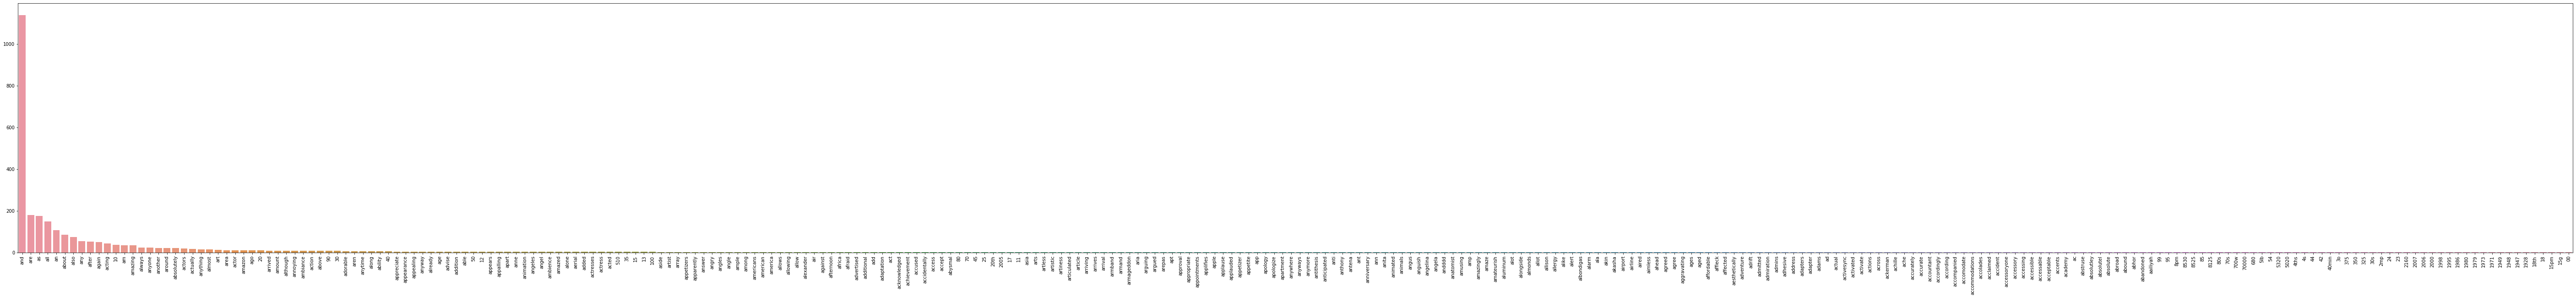

In [88]:
x_15 = [x for _,x in sorted(zip(list(term_frequencies[0:300]),count_vect.get_feature_names()[0:300]),reverse=True)]
y_15 = [_ for _,x in sorted(zip(list(term_frequencies[0:300]),count_vect.get_feature_names()[0:300]),reverse=True)]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x_15, 
            y=y_15)
g.set_xticklabels(x_15, rotation = 90);

In [89]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

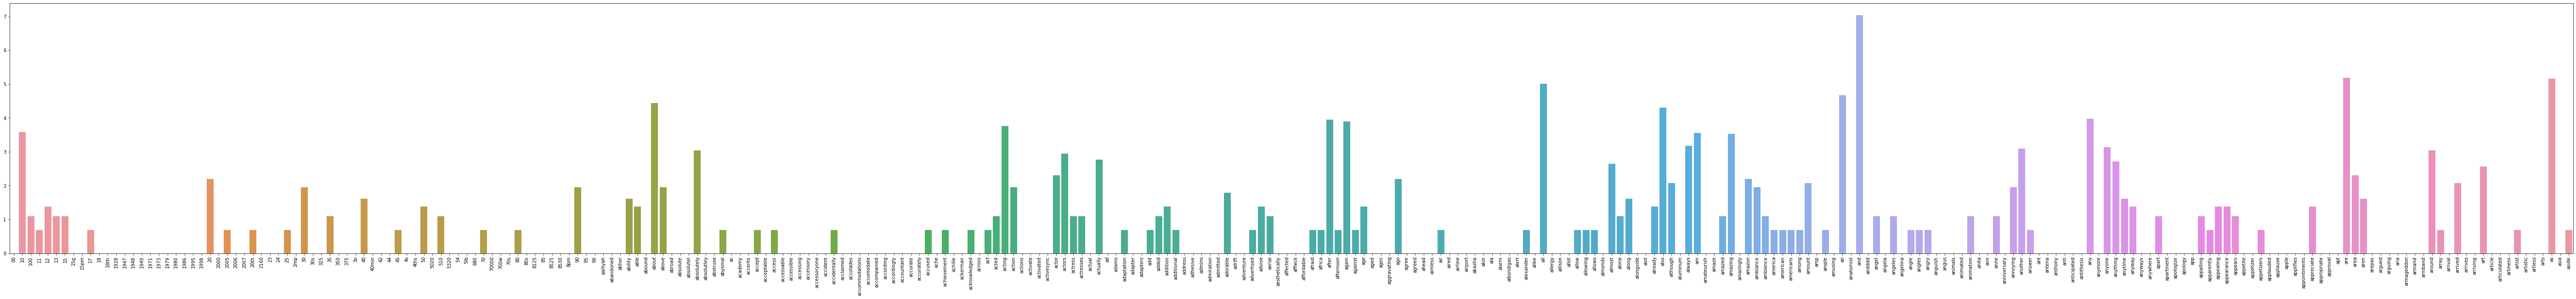

In [90]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [91]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [92]:
mlb = preprocessing.LabelBinarizer()

In [93]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [94]:
mlb.classes_

array(['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled'],
      dtype='<U21')

In [95]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [96]:
X[0:9]

text  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   
5  I have to jiggle the plug to get it to line up...    0.0   
6  If you have several dozen or several hundred c...    0.0   
7        If you are Razr owner...you must have this!    1.0   
8                Needless to say, I wasted my money.    0.0   

                category                                           unigrams  \
0  amazon_cells_labelled  [So, there, is, no, way, for, me, to, plug, it...   
1  amazon_cells_labelled               [Good, case, ,, Excellent, value, .]   
2  amazon_cells_labelled                      [Great, for, the, jawbone, .]   
3  amazon_cells_labelled  [Tied, to, charger, for, conversations, lastin...   
4  amazon_cells_labelled                           [The, mic, is, great, .]   
5  amazon_cells_labelled  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  amazon_cells_labelled  [If, you, have, several, dozen, or, several, h...   
7  amazon_cells_labelled  [If, you, are, Razr, owner, ..., you, must, ha...   
8  amazon_cells_labelled    [Needless, to, say, ,, I, wasted, my, money, .]   

  bin_category  
0    [1, 0, 0]  
1    [1, 0, 0]  
2    [1, 0, 0]  
3    [1, 0, 0]  
4    [1, 0, 0]  
5    [1, 0, 0]  
6    [1, 0, 0]  
7    [1, 0, 0]  
8    [1, 0, 0]

In [97]:
# Sometimes you need to take a peek at your data to understand the relationships in your dataset
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [98]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [99]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [100]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third Part : please attempt the following tasks on the new dataset

---

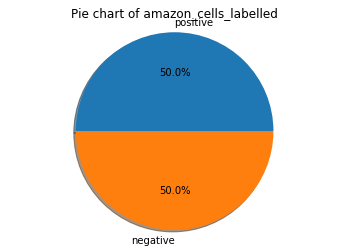

In [101]:
# Generate meaningful new data visualizations
# 我想到的方式是對amazon_cells_labelled、imdb_labelled、yelp_labelled各別用圓餅圖觀察，positive score和negative score的比例
# 以下作圖:
labels = "positive", "negative"
size = []

amazon_cells_labelled_list = []
imdb_labelled_list = []
yelp_labelled = []

positive_count = 0
negative_count = 0

dataset_for_vis = dataset1[:][1]
positive_count = dataset_for_vis.sum(axis=0)
negative_count = len(dataset_for_vis) - positive_count

size.append(positive_count)
size.append(negative_count)
plt.pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Pie chart of amazon_cells_labelled")
plt.show()

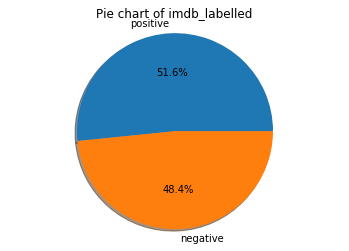

In [102]:
dataset_for_vis = dataset2[:][1]
positive_count = dataset_for_vis.sum(axis=0)
negative_count = len(dataset_for_vis) - positive_count

size[0] = positive_count
size[1] = negative_count
plt.pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Pie chart of imdb_labelled")
plt.show()

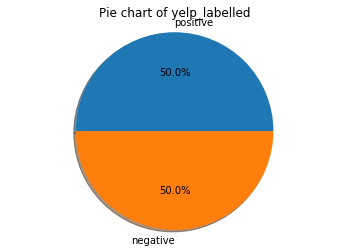

In [103]:
dataset_for_vis = dataset3[:][1]
positive_count = dataset_for_vis.sum(axis=0)
negative_count = len(dataset_for_vis) - positive_count

size[0] = positive_count
size[1] = negative_count
plt.pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Pie chart of yelp_labelled")
plt.show()

In [104]:
# 可以發現上面的資料分布，除了IMDB的部分，其他都是50%、50%，資料分布蠻均勻的
# 接下來我會想看amazon這個set中，對於positive來說最常出現的100個單詞(TD-IDF分析)，與對於negative來說最常出現的100個單詞分別是什麼，這裡就以HeatMap呈現
# 如此我就可以比對一下positive跟negative分別最常出現的單字來獲得一些想法
from sklearn.feature_extraction.text import TfidfVectorizer

dataset1_positive = dataset1[dataset1[:][1]!=0]
dataset1_negative = dataset1[dataset1[:][1]!=1]
dataset1_positive.columns = ["text", "score"]
dataset1_negative.columns = ["text", "score"]

vectorizer_amazon_positive = TfidfVectorizer(min_df=1)
vectorizer_amazon_negative = TfidfVectorizer(min_df=1)
X_TD_IDF_amazon_positive = vectorizer_amazon_positive.fit_transform(dataset1_positive.text)
X_TD_IDF_amazon_negative = vectorizer_amazon_negative.fit_transform(dataset1_negative.text)

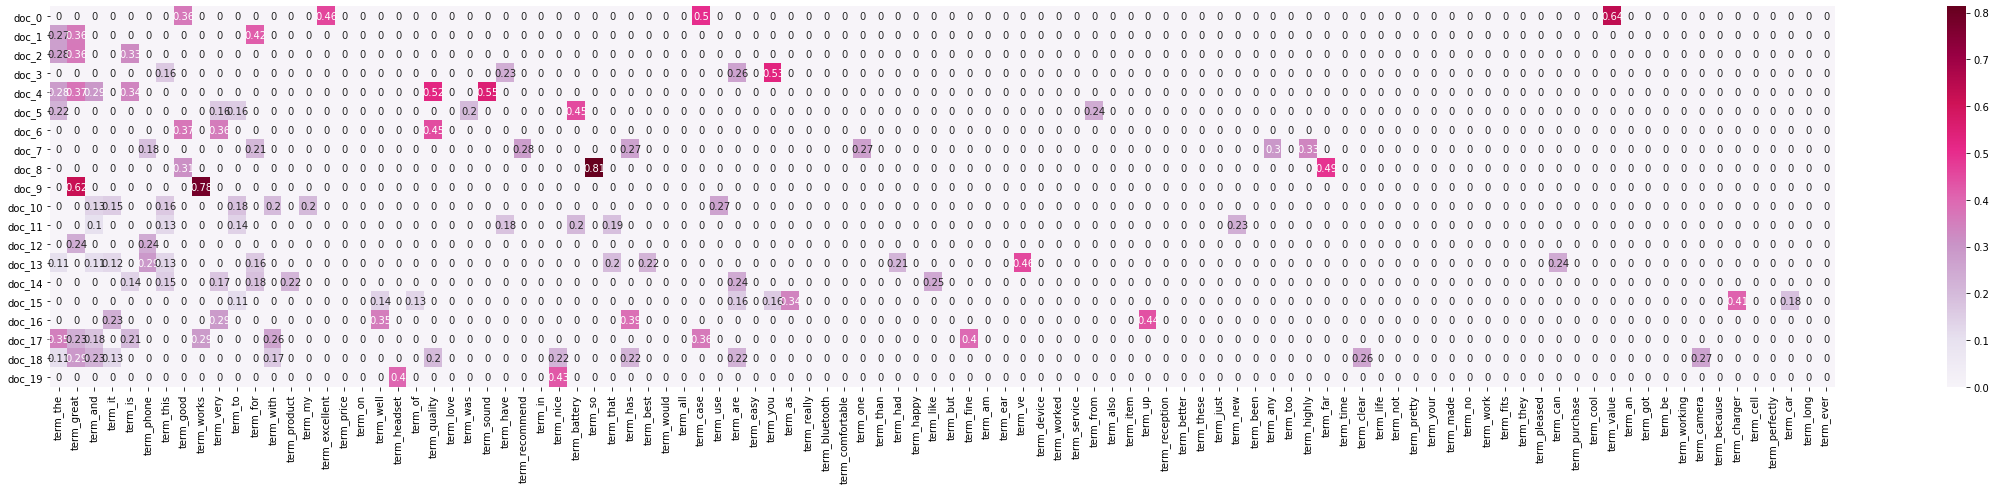

In [105]:
# 以下是做postive score的部分(TD-IDF sorting)
temp_x = vectorizer_amazon_positive.get_feature_names()[:]
temp_z = X_TD_IDF_amazon_positive[:,:].toarray()
temp_z = np.transpose(temp_z)
temp_z_sum = np.asarray(X_TD_IDF_amazon_positive.sum(axis=0))[0]

x_11 = []
y_11 = []
z_11 = []
for i in sorted(zip(list(temp_z_sum),list(temp_z),list(temp_x)),reverse=True,key=lambda x: x[0]):
    x_11.append(i[0])
    y_11.append(i[1])
    z_11.append(i[2])

plot_x = ["term_"+str(i) for i in z_11[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
y_11 = np.array(y_11)
y_11 = np.transpose(y_11)
plot_z = y_11[0:20, 0:100]
max_num = 0
for a in plot_z:
    for b in a:
        if b > max_num : max_num = b


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(40, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_num, annot=True)

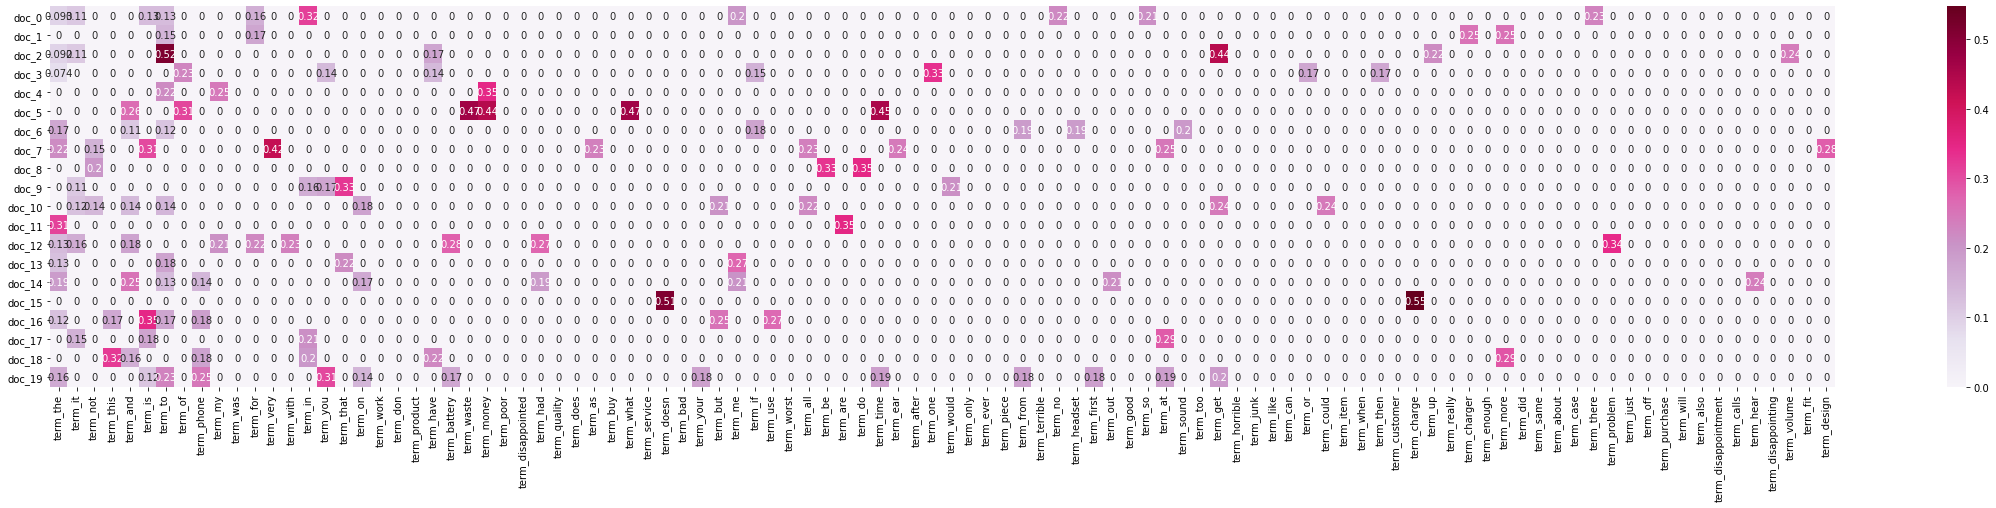

In [106]:
# 以下是做negative的部分(TD-IDF sorting)
temp_x = vectorizer_amazon_negative.get_feature_names()[:]
temp_z = X_TD_IDF_amazon_negative[:,:].toarray()
temp_z = np.transpose(temp_z)
temp_z_sum = np.asarray(X_TD_IDF_amazon_negative.sum(axis=0))[0]

x_11 = []
y_11 = []
z_11 = []
for i in sorted(zip(list(temp_z_sum),list(temp_z),list(temp_x)),reverse=True,key=lambda x: x[0]):
    x_11.append(i[0])
    y_11.append(i[1])
    z_11.append(i[2])

plot_x = ["term_"+str(i) for i in z_11[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
y_11 = np.array(y_11)
y_11 = np.transpose(y_11)
plot_z = y_11[0:20, 0:100]
max_num = 0
for a in plot_z:
    for b in a:
        if b > max_num : max_num = b


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(40, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_num, annot=True)

In [107]:
# 以下是計算TF-IDF的部分
All_texts = X[:]['text']

In [108]:
# The list of all text
All_texts = list(All_texts)

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)
X_TD_IDF = vectorizer.fit_transform(All_texts)

In [110]:
vectorizer.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [111]:
X_TD_IDF = X_TD_IDF.toarray()

In [112]:
X_TD_IDF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
# Naive Bayes classifier
Y_TD_IDF_Naive = [] # The list of category --> 0 for amazon_cells_labelled, 1 for imdb_labelled, 2 for yelp_labelled
for i in X.category:
    if i == "amazon_cells_labelled":Y_TD_IDF_Naive.append(0)
    elif i == "imdb_labelled":Y_TD_IDF_Naive.append(1)
    else:Y_TD_IDF_Naive.append(2)

In [114]:
Y_TD_IDF_Naive = np.array(Y_TD_IDF_Naive)
Y_TD_IDF_Naive

array([0, 0, 0, ..., 2, 2, 2])

In [115]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# TF-IDF features
X_TD_IDF_Train, X_TD_IDF_Test, Y_TD_IDF_Naive_Train, Y_TD_IDF_Naive_Test = train_test_split(X_TD_IDF, Y_TD_IDF_Naive, test_size=0.2, random_state=777)
mnb_TD_IDF = MultinomialNB()
mnb_TD_IDF.fit(X_TD_IDF_Train, Y_TD_IDF_Naive_Train)
Predict_answer = mnb_TD_IDF.predict(X_TD_IDF_Test)

print(Predict_answer)      # Predict answer
print(Y_TD_IDF_Naive_Test) # Real answer

TD_IDF_Correct = 0
for i in range(len(Y_TD_IDF_Naive_Test)):
    if Y_TD_IDF_Naive_Test[i] == Predict_answer[i]:TD_IDF_Correct+=1

print("Accuracy(TD-IDF):",(TD_IDF_Correct * 100 / len(Y_TD_IDF_Naive_Test)),"%")

[2 0 1 2 2 2 0 0 2 0 2 1 1 0 2 2 0 1 2 2 0 2 2 0 2 0 1 1 1 0 0 0 2 1 0 2 0
 2 0 2 0 2 1 0 0 2 1 2 0 2 2 2 0 2 2 0 2 1 2 0 1 2 0 0 0 2 1 1 2 0 2 2 1 2
 0 0 0 1 0 2 2 2 2 1 0 0 2 2 2 1 1 0 0 2 0 2 0 0 0 2 2 0 1 1 1 2 0 2 0 0 2
 0 0 1 0 1 0 2 2 1 2 1 2 0 2 0 0 2 2 2 2 0 0 0 0 2 2 2 0 2 2 2 2 1 0 0 2 0
 0 2 0 0 2 2 2 2 0 0 2 2 2 0 0 0 1 1 2 2 2 2 0 1 0 2 2 0 0 0 0 2 2 2 1 0 2
 0 0 2 2 2 1 2 2 0 1 2 0 2 1 1 0 1 2 2 0 0 2 2 2 0 0 0 2 0 1 2 0 2 2 0 1 1
 2 2 0 2 2 2 0 0 0 2 2 2 1 2 1 2 0 1 0 1 2 2 0 0 0 0 2 2 2 1 2 2 0 1 2 1 2
 1 2 0 1 1 0 0 0 1 0 0 0 2 0 2 0 0 2 2 2 1 0 0 2 1 0 0 1 0 0 2 0 0 2 0 2 0
 2 2 0 0 1 1 0 1 1 1 2 0 0 2 0 2 0 0 0 1 1 2 0 1 2 2 2 0 1 2 2 1 2 1 2 2 1
 0 0 0 1 1 2 0 2 1 1 2 2 1 2 0 0 1 2 0 0 0 2 0 2 2 1 2 0 0 0 2 0 1 2 0 1 0
 0 2 1 2 0 2 2 2 0 0 0 0 2 1 0 2 1 1 1 0 0 2 2 1 0 0 0 2 0 2 2 2 2 0 1 2 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 1 2 1 2 0 0 0 0 1 0 2 0
 0 2 2 2 1 0 0 1 0 0 0 2 2 0 0 2 0 2 0 0 2 0 2 2 2 1 2 0 2 0 2 2 0 2 0 0 2
 2 1 0 2 2 2 2 0 0 0 2 2 

In [116]:
# Word frequency features
X_frequency_Train, X_frequency_Test, Y_frequency_Naive_Train, Y_frequency_Naive_Test = train_test_split(X_counts, Y_TD_IDF_Naive, test_size=0.2, random_state=777)
mnb_frequency = MultinomialNB()
mnb_frequency.fit(X_frequency_Train, Y_frequency_Naive_Train)
Predict_answer = mnb_frequency.predict(X_frequency_Test)

print(Predict_answer)         # Predict answer
print(Y_frequency_Naive_Test) # Real answer

frequency_Correct = 0
for i in range(len(Y_frequency_Naive_Test)):
    if Y_frequency_Naive_Test[i] == Predict_answer[i]:frequency_Correct+=1

print("Accuracy(Word frequency):",(frequency_Correct * 100 / len(Y_frequency_Naive_Test)),"%")

[2 0 1 2 2 2 0 0 2 0 2 1 1 0 2 2 0 0 2 2 1 2 2 0 2 0 1 1 1 0 0 0 2 0 1 2 0
 2 0 2 0 2 1 0 0 2 1 2 0 2 2 2 0 2 2 0 2 1 2 0 1 2 0 0 0 2 1 1 2 0 2 2 1 2
 0 0 0 1 0 2 2 2 2 1 1 0 0 2 2 1 1 0 0 2 0 2 2 0 0 2 2 0 1 1 1 2 0 1 0 1 2
 0 0 1 0 1 0 2 1 1 2 1 2 0 2 0 0 2 2 2 2 0 1 0 0 2 2 1 0 2 2 2 2 1 0 0 2 0
 0 2 0 1 2 2 1 2 0 0 2 2 1 0 0 1 1 1 2 2 2 2 0 1 0 2 2 0 0 0 0 2 2 2 1 0 2
 0 0 2 2 1 1 2 2 0 1 0 0 2 1 1 0 1 2 1 0 0 2 2 2 0 1 0 2 0 1 2 0 2 2 0 1 1
 1 2 0 2 2 2 0 0 0 2 2 2 1 2 1 2 0 1 0 1 2 1 0 0 0 0 2 1 1 1 2 1 0 1 2 1 2
 1 2 0 1 1 0 0 0 1 0 0 0 2 0 2 2 0 2 2 2 1 1 0 1 1 1 0 1 0 0 2 0 0 2 0 2 1
 2 2 0 0 1 1 0 1 1 1 2 0 0 1 1 2 1 0 0 1 1 2 0 1 2 2 2 0 1 2 2 1 2 1 2 2 1
 0 0 0 1 1 2 0 2 1 1 2 2 1 2 0 1 1 2 0 0 0 1 0 2 2 1 2 0 0 0 2 0 1 2 0 1 1
 0 2 1 2 0 2 2 2 0 0 0 0 2 1 0 2 1 1 1 1 0 2 0 1 0 0 0 2 0 2 2 2 2 0 1 2 2
 0 0 0 0 2 1 0 0 0 0 0 0 1 0 0 2 0 0 1 2 0 0 2 0 0 1 2 1 2 0 1 0 0 1 0 2 0
 0 2 2 2 1 0 0 1 0 0 0 2 2 0 1 2 0 1 0 2 2 0 1 2 2 1 1 0 2 0 2 2 0 2 1 1 2
 1 1 0 2 2 2 2 0 0 0 2 2 

In [117]:
# 以下說明 Differences
# 在TD-IDF的情況下會考慮的比較完善，他不只考慮了一個單詞出現在某個句子中的頻率，還考慮了那個單詞在所有句子中出現的頻率(這裡的算法按照文章中計算)
# 如此便可以區分那個單字的有效性，畢竟如果那個單詞在太多文件中，可能表示這個單詞較為不重要，因此他的權重應該要比較低一點
# 實做完後可以發現兩種方法的正確率都落在85%左右。至於為什麼反而是word frequency的準確率較高一點，我覺得可能是trainning set資料太少，所以比較不准

In [118]:
# 第四部份
# 我發現總共有4個not meaningful or efficiency的地方
# (1) Data Exploration的部分，它挑了index分別為50、100、150的資料，然後比對這三個資料彼此之間的相似度，但是卻發現如果只有考慮三個資料
#     其實並不會看出什麼規則。如果可以考慮更多資料之間的比較，比較能看出些什麼東西，像是pairplot來畫出多一點資料資間的關係。這裡可能只是
#     為了方便教cosine_similarity怎麼用。
# (2) 在每一個單詞對所有句子計算出現次數的方法，有用sum(X_counts[:,j].toarray())的，也有X_counts.sum(axis=0)的，可以發現後面的方法實
#     在是快了許多。
# (3) HeatMap圖形的部分，會發現所有的值幾乎是0，這樣無法看出什麼東西，除非用更大的HeatMap，但是這要會造成計算量過於龐大，於是乎我的解決
#     方式是把各個單詞在所有文件中的次數加起來，然後排序取一定量(從大到小)，這樣就可以發現比較常出現的單詞在前面，也就不會讓value幾乎都
#     是0，而產生看不出任何Idea的窘境。
# (4) New Dataset在做PCA到3維的結果是幾乎都聚在一坨，由此可知它並不適合做PCA，做了也達不到理想中的效果。這裡使用它可能也是為了達到教學的
#     目的